In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
test_dataset2 = test_dataset

In [3]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test_dataset.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
def clean(data):
    data = data.drop(['Cabin', 'Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerId'],axis=1)
    data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].value_counts().index[0])
    data['Destination']=data['Destination'].fillna(data['Destination'].value_counts().index[0])
    data['CryoSleep']=data['CryoSleep'].fillna(data['CryoSleep'].value_counts().index[0])
    data['Age'] =  data['Age'].fillna(data['Age'].median())
    data['VIP']=data['VIP'].fillna(data['VIP'].value_counts().index[0])
    return data 

In [8]:
train_dataset = clean(train_dataset)
test_dataset = clean(test_dataset)

In [13]:
train_dataset.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [14]:
test_dataset.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
dtype: int64

In [15]:
train_dataset

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True
2,Europa,False,TRAPPIST-1e,58.0,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False
8689,Earth,True,PSO J318.5-22,18.0,False,False
8690,Earth,False,TRAPPIST-1e,26.0,False,True
8691,Europa,False,55 Cancri e,32.0,False,False


In [16]:
test_dataset

,HomePlanet,CryoSleep,Destination,Age,VIP
0,Earth,True,TRAPPIST-1e,27.0,False
1,Earth,False,TRAPPIST-1e,19.0,False
2,Europa,True,55 Cancri e,31.0,False
3,Europa,False,TRAPPIST-1e,38.0,False
4,Earth,False,TRAPPIST-1e,20.0,False
...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False
4273,Earth,False,TRAPPIST-1e,42.0,False
4274,Mars,True,55 Cancri e,26.0,False
4275,Europa,False,TRAPPIST-1e,26.0,False


In [17]:
X = train_dataset.iloc[:, :-1].values
y = train_dataset.iloc[:, -1].values
test_dataset = test_dataset.values

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
y_test

array([ True,  True, False, ...,  True, False,  True])

In [20]:
y_train

array([False, False, False, ..., False, False, False])

In [21]:
y_train = np.multiply(y_train,1)
y_test = np.multiply(y_test,1)

X_train[:, 1] = np.multiply(X_train[:, 1], 1)
X_train[:, 4] = np.multiply(X_train[:, 4], 1)

X_test[:, 1] = np.multiply(X_test[:, 1], 1)
X_test[:, 4] = np.multiply(X_test[:, 4], 1)

test_dataset[:, 1] = np.multiply(test_dataset[:, 1], 1)
test_dataset[:, 4] = np.multiply(test_dataset[:, 4], 1)

In [22]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2])], remainder='passthrough')
X_train = ct1.fit_transform(X_train)
X_test = ct1.fit_transform(X_test)
test_dataset = ct1.fit_transform(test_dataset)

In [23]:
train_dataset

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True
2,Europa,False,TRAPPIST-1e,58.0,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False
8689,Earth,True,PSO J318.5-22,18.0,False,False
8690,Earth,False,TRAPPIST-1e,26.0,False,True
8691,Europa,False,55 Cancri e,32.0,False,False


In [24]:
test_dataset

array([[1.0, 0.0, 0.0, ..., 1, 27.0, 0],
       [1.0, 0.0, 0.0, ..., 0, 19.0, 0],
       [0.0, 1.0, 0.0, ..., 1, 31.0, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 26.0, 0],
       [0.0, 1.0, 0.0, ..., 0, 26.0, 0],
       [1.0, 0.0, 0.0, ..., 1, 43.0, 0]], dtype=object)

In [25]:
X_test

array([[1.0, 0.0, 0.0, ..., 0, 16.0, 0],
       [1.0, 0.0, 0.0, ..., 0, 2.0, 0],
       [1.0, 0.0, 0.0, ..., 0, 31.0, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 23.0, 0],
       [0.0, 0.0, 1.0, ..., 0, 23.0, 0],
       [0.0, 1.0, 0.0, ..., 0, 58.0, 0]], dtype=object)

In [26]:
X_train

array([[0.0, 1.0, 0.0, ..., 0, 54.0, 0],
       [1.0, 0.0, 0.0, ..., 0, 20.0, 0],
       [0.0, 0.0, 1.0, ..., 0, 43.0, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 29.0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0.0, 0],
       [1.0, 0.0, 0.0, ..., 0, 45.0, 0]], dtype=object)

In [27]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [28]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

test_model = SVC(kernel='rbf')
params = {'C': [0.25, 0.5, 0.75, 1], 
          'gamma': ['scale', 'auto'], 
          'shrinking': [True, False], 
          'verbose': [True, False],
          'random_state': [0,1,2,5,10,100,420]}
model_grid = GridSearchCV(test_model, param_grid = params)
model_grid.fit(X_train, y_train)
print(f'best params: {model_grid.best_params_}')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [43]:
model = SVC(kernel='rbf', C=0.75, gamma='auto', random_state=0, shrinking=True, verbose=True).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

scores = cross_val_score(model, X_test, y_test, cv = 10)
print(f'Cross val score for our model: {scores.mean()}')

print(confusion_matrix(y_test, y_pred))

[LibSVM]0.730879815986199
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross val score for our model: 0.7176566341106903
[[736 127]
 [341 535]]


In [44]:
y_prediction = model.predict(test_dataset)
result = list()
for i in y_prediction:
    if i == 1:
        result.append(True)
    else:
        result.append(False)

In [45]:
submission = pd.DataFrame({
    "PassengerId" : test_dataset2["PassengerId"],
    "Survived" : result
})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
submission.head(4277)

,PassengerId,Survived
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False


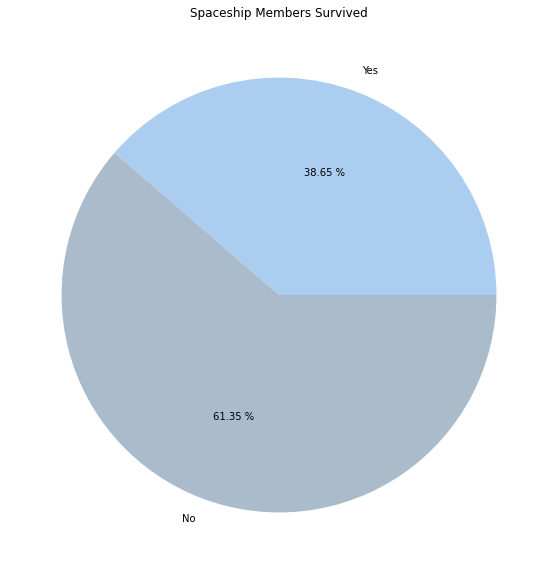

4277


In [46]:
yes = submission.loc[submission['Survived'] == True].count()[1]
no = submission.loc[submission['Survived'] == False].count()[1]

plt.figure(figsize=(10,10))

labels = ['Yes', 'No']
colors = ['#abcdef', '#aabbcc']

plt.pie([yes, no], labels=labels, colors=colors, autopct='%.2f %%')
plt.title("Spaceship Members Survived")
plt.show()

print(yes+no)